In [14]:
import cv2
import numpy as np
from google.colab import drive
import os
drive.mount('/content/gdrive')
from google.colab.patches import cv2_imshow

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

squaresize = 84
objp = np.zeros((48,3), np.float32)
objp[:,:2] = (np.mgrid[0:8,0:6].T.reshape(-1,2))*squaresize
imgpoints_l = []
imgpoints_r = []
objpoints = [] 
path_l = "/content/gdrive/My Drive/CV_Assignment-6/Lab6/cam1/"
path_r = "/content/gdrive/My Drive/CV_Assignment-6/Lab6/cam2/"
files = os.listdir(path_l);
for fname in files:
  img_l = cv2.imread(path_l + fname)
  gray_l = cv2.cvtColor(img_l,cv2.COLOR_BGR2GRAY)
  #cv2_imshow(img_l)
  img_r = cv2.imread(path_r + fname)
  gray_r = cv2.cvtColor(img_r,cv2.COLOR_BGR2GRAY)
  
  ret_l, corners_l = cv2.findChessboardCorners(gray_l, (8,6),None)
  ret_r, corners_r = cv2.findChessboardCorners(gray_r, (8,6),None)

  if ret_l == True and ret_r == True:
    #print(fname);
    objpoints.append(objp)

    corners2_l = cv2.cornerSubPix(gray_l,corners_l,(11,11),(-1,-1),criteria)
    imgpoints_l.append(corners2_l)

    corners2_r = cv2.cornerSubPix(gray_r,corners_r,(11,11),(-1,-1),criteria)
    imgpoints_r.append(corners2_r)

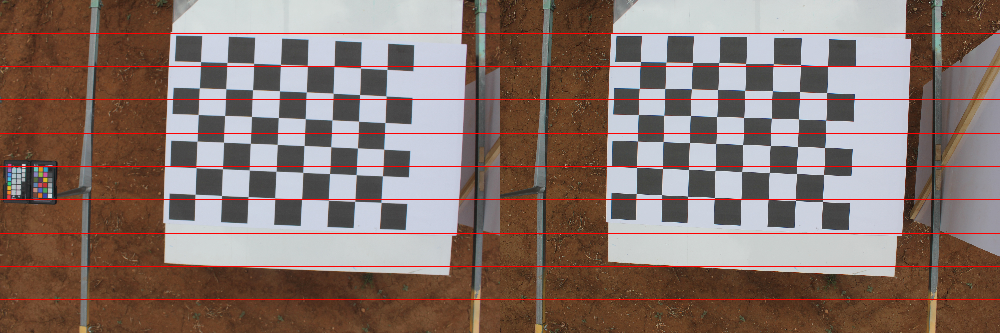

In [35]:
scale_factor = 500.0/img_l.shape[1]
height = int(img_l.shape[1]*scale_factor)
width = int(img_l.shape[0]*scale_factor)
img_l = cv2.resize(img_l,(height,width))
img_r = cv2.resize(img_r,(height,width))

for line in range(1,10):
    img_l[int(line*img_l.shape[0]/10), :] = (0, 0, 255)
    img_r[int(line*img_r.shape[0]/10), :] = (0, 0, 255)
cv2_imshow(np.hstack([img_l, img_r]))


In [0]:
retl, mtxl, distl, rvecsl, tvecsl = cv2.calibrateCamera(objpoints, imgpoints_l, gray_l.shape[::-1],None,None)
retr, mtxr, distr, rvecsr, tvecsr = cv2.calibrateCamera(objpoints, imgpoints_r, gray_r.shape[::-1],None,None)

ret,mtx1,dist1,mtx2,dist2,R,T,E,F = cv2.stereoCalibrate(objpoints,imgpoints_l,imgpoints_r,mtxl,distl,mtxr,distr,gray_l.shape[::-1])

R1, R2, P1, P2, Q, roi1, roi2 = cv2.stereoRectify(mtxl, distl, mtxr, distr, gray_l.shape[::-1], R, T);

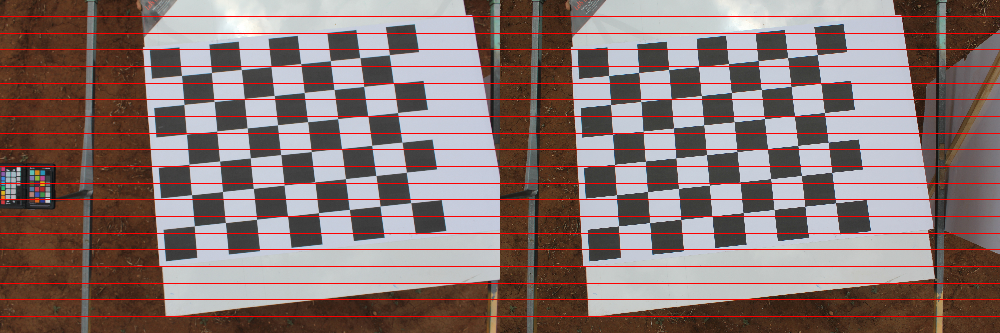

In [37]:
map_l = cv2.initUndistortRectifyMap(mtxl, distl, R1, P1, gray_l.shape[::-1], cv2.CV_16SC2)
map_r = cv2.initUndistortRectifyMap(mtxr, distr, R2, P2, gray_r.shape[::-1], cv2.CV_16SC2)

img_l = cv2.imread("/content/gdrive/My Drive/CV_assignment-7/lab7/IMG_0012left.jpeg") 
img_r = cv2.imread("/content/gdrive/My Drive/CV_assignment-7/lab7/IMG_0012right.jpeg") 


op_l = cv2.remap(img_l, map_l[0], map_l[1], cv2.INTER_LANCZOS4)
op_r = cv2.remap(img_r, map_r[0], map_r[1], cv2.INTER_LANCZOS4)

scale_factor = 500.0/op_l.shape[1]
height = int(op_l.shape[1]*scale_factor)
width = int(op_l.shape[0]*scale_factor)
op_l = cv2.resize(op_l,(height,width))
op_r = cv2.resize(op_r,(height,width))


for line in range(1,20):
    op_l[int(line*op_l.shape[0]/20), :] = (0, 0, 255)
    op_r[int(line*op_l.shape[0]/20), :] = (0, 0, 255)
cv2_imshow(np.hstack([op_l, op_r]))

In [0]:
img_l = cv2.imread("/content/gdrive/My Drive/CV_assignment-7/lab7/IMG_0012left.jpeg") 
img_r = cv2.imread("/content/gdrive/My Drive/CV_assignment-7/lab7/IMG_0012right.jpeg") 

gray_l = cv2.cvtColor(img_l,cv2.COLOR_BGR2GRAY)
gray_r = cv2.cvtColor(img_r,cv2.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(gray_l,None)
kp2, des2 = orb.detectAndCompute(gray_r,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)

ret_l, corners_l = cv2.findChessboardCorners(gray_l, (8,6),None)
ret_r, corners_r = cv2.findChessboardCorners(gray_r, (8,6),None)

if ret_l == True and ret_r == True:
  corners2_l = cv2.cornerSubPix(gray_l,corners_l,(11,11),(-1,-1),criteria)
  corners2_r = cv2.cornerSubPix(gray_r,corners_r,(11,11),(-1,-1),criteria)
F_mat,mask = cv2.findFundamentalMat(corners2_l,corners2_r)

In [0]:
ret,H1,H2 = cv2.stereoRectifyUncalibrated(corners2_l, corners2_r, F_mat, gray_l.shape[::-1])

In [0]:
op_l = cv2.warpPerspective(img_l,H1,gray_l.shape[::-1])
op_r = cv2.warpPerspective(img_r,H2,gray_l.shape[::-1])
scale_factor = 500.0/op_l.shape[1]
height = int(op_l.shape[1]*scale_factor)
width = int(op_l.shape[0]*scale_factor)
op_l = cv2.resize(op_l,(height,width))
op_r = cv2.resize(op_r,(height,width))

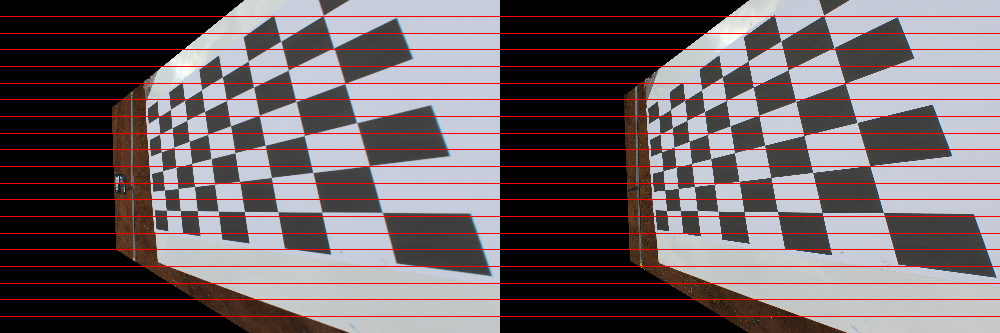

In [41]:
for line in range(1,20):
    op_l[int(line*op_l.shape[0]/20), :] = (0, 0, 255)
    op_r[int(line*op_l.shape[0]/20), :] = (0, 0, 255)
cv2_imshow(np.hstack([op_l, op_r]))